# DSSG BERLIN DATATHON 2024 
## The Effect of Education on Economic Growth


# Visualization Guide

## How to create good visualizations?


- **Know your audience**: Understand who will be viewing the visualization and what information they are interested in. This will help you determine what data to include and how to present it.
- **Choose the right type of visualization**: Different types of visualizations are better suited for different types of data and messages. For example, bar charts are good for comparing quantities, line charts are good for showing trends over time, and scatter plots are good for showing relationships between two numerical variables.
- **Keep it simple**: Avoid cluttering the visualization with unnecessary information or decorations. The focus should be on the data and the message you want to convey.
- **Use color effectively**: Use color to highlight important information or to group related data. Be careful not to use too many colors, as this can make the visualization confusing.
- **Label clearly**: Make sure all axes, legends, and other labels are clear and easy to read. Use descriptive titles to help the viewer understand the visualization.
- **Consider interactivity**: Interactive visualizations can allow viewers to explore the data in more depth, but they should be used judiciously and only when they add value to the visualization.
- **Test your visualization**: Show the visualization to others and get their feedback. This can help you identify any areas that are unclear or confusing.

## Visualization Types

- **Pie charts**: Good for showing the proportion of a whole. For example, the proportion of a country's budget that is allocated to education. 
- **Line charts**: Good for showing trends over time. For example, GDP growth rate per country over time.
- **Scatter plots**: Good for showing relationships between two numerial varialbes. For example, the relationship between a country's GDP per capita and its literacy rate. 
- **Bar charts**: Good for comparing quantities. For example, the number of years of compulsory education in different countries.
- **Stacked bar charts**: Good for comparing totals and parts of a whole. For example, the number of female and male students  students finishing school each year.
- **Histograms**: Good for showing the distribution of a numerical variable. For example, the distribution of years of education in a population.
- **Geo charts**: Good for showing geographical data. For example, the number of graduaed people in each country. 
<br> <br>
Remember, the key to choosing the right type of visualization is to consider the data you have and the message you want to convey. By selecting the appropriate visualization, you can communicate your message clearly and effectively.

## Example Visualizations

In [16]:
# Import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data: 
df = pd.read_csv("dataset.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,value
0,Aruba,ABW,"Children out of school, primary, female",SE.PRM.UNER.FE,1970,NaN
1,Africa Eastern and Southern,AFE,"Children out of school, primary, female",SE.PRM.UNER.FE,1970,NaN
2,Afghanistan,AFG,"Children out of school, primary, female",SE.PRM.UNER.FE,1970,NaN
3,Africa Western and Central,AFW,"Children out of school, primary, female",SE.PRM.UNER.FE,1970,NaN
4,Angola,AGO,"Children out of school, primary, female",SE.PRM.UNER.FE,1970,NaN


<br> <br>
## Development of the Unemployment Rate in Germany, UK, and France
<br>
How does the unemployment rate develop in different countries? <br>
What is the general trend of the unemployment rate in these European countries?

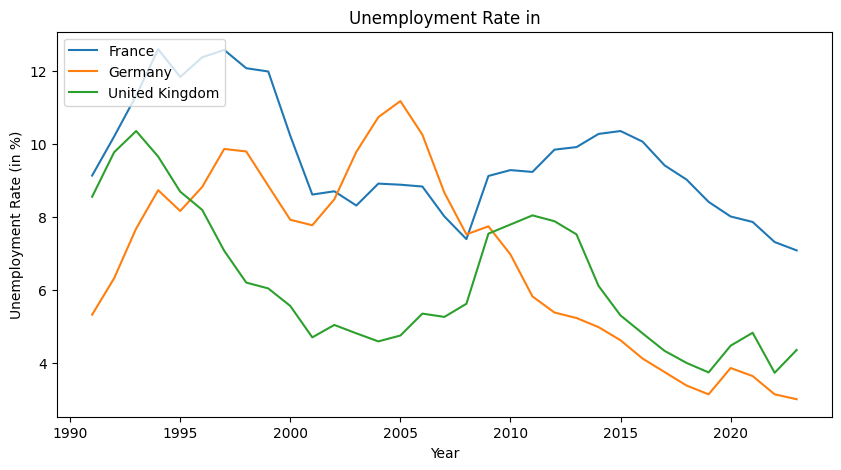

In [3]:
# Reshape the data into a suitable format for a line chart
df_pivot = df[(df["Indicator Name"] == "Unemployment, total (% of total labor force) (modeled ILO estimate)")\
             & (df["Country Name"].isin(["United Kingdom","Germany","France"]))]\
            .pivot(index="year", columns = "Country Name", values = "value")

# Create the line chart
plt.figure(figsize=(10,5))
plt.plot(df_pivot.index, df_pivot.values)
plt.title("Unemployment Rate in")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (in %)")
plt.legend(df_pivot.columns, loc = "upper left")

# Show the plot
plt.show()

<br> <br>
## Number of females and males in the labor market
<br>
What was the percentage of females and males in the labor market last year? <br>
Are there differences in the share across different countries??

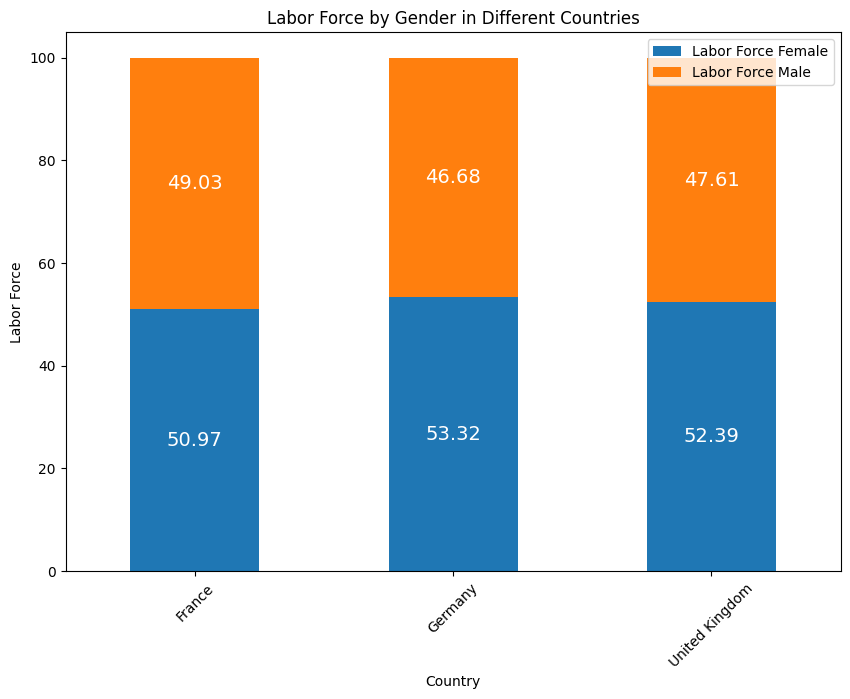

In [4]:
# Reshape the data into a suitable format for a line chart
df_labor = df[(df["Indicator Name"].isin(["Labor force, female (% of total labor force)", "Labor force, total"]))\
             & (df["Country Name"].isin(["United Kingdom", "Germany","France"]))]\
           .pivot_table(index=["year", "Country Name", "Country Code"], columns="Indicator Name", values="value",aggfunc = "sum")\
           .reset_index()

# Get data for the year 2023 
df_labor = df_labor[df_labor["year"]== 2023]

# Calculate the male labor force
df_labor["Labor force, male (% of total labor force)"] = 100 - df_labor["Labor force, female (% of total labor force)"]

# Set the index to 'Country' for easier plotting
df_labor.set_index("Country Name", inplace=True)

# Plotting the stacked bar chart
ax = df_labor[["Labor force, male (% of total labor force)", "Labor force, female (% of total labor force)"]].plot(kind="bar", stacked=True, figsize=(10, 7))

# Adding labels within the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center', fontsize=14, color='white')

# Adding labels and title
ax.set_xlabel("Country")
ax.set_ylabel("Labor Force")
ax.set_title("Labor Force by Gender in Different Countries")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(["Labor Force Female", "Labor Force Male"])

# Show the plot
plt.show()

<br> <br>
## Youth Literacy Rate in Different Regions
<br>
What was the youth literacy rate in 2022? <br>
What are the differences across different countries?

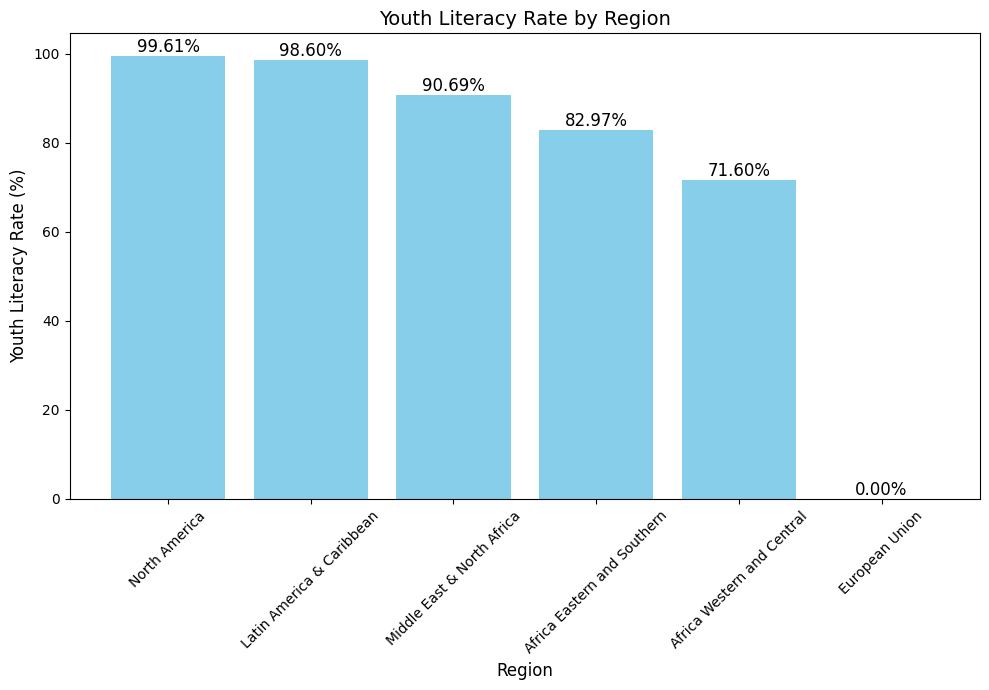

In [5]:
# Reshape the data into a suitable format for a line chart
df_lit = df[(df["Indicator Name"] == "Literacy rate, youth total (% of people ages 15-24)")\
           & (df["year"] == 2022)
           & (df["Country Name"].isin(["European Union","Africa Eastern and Southern","Africa Western and Central","Latin America & Caribbean","Middle East & North Africa","North America"]))
           ]\
           .pivot_table(index=["year", "Country Name", "Country Code"], columns="Indicator Name", values="value",aggfunc = "sum")\
           .reset_index()

# Sort the DataFrame by Literacy Rate in descending order
df_lit = df_lit.sort_values(by="Literacy rate, youth total (% of people ages 15-24)", ascending=False)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(df_lit["Country Name"], df_lit["Literacy rate, youth total (% of people ages 15-24)"], color='skyblue')

# Adding labels within the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# Adding labels and title
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Youth Literacy Rate (%)", fontsize=12)
ax.set_title("Youth Literacy Rate by Region", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Display the plot
plt.tight_layout()
plt.show()



### Attention!! 
**A literacy rate of 0% in the European Union does not make sense. This data point seems to be missing --> Pay attention to NULL values**

## Correlation Matrix

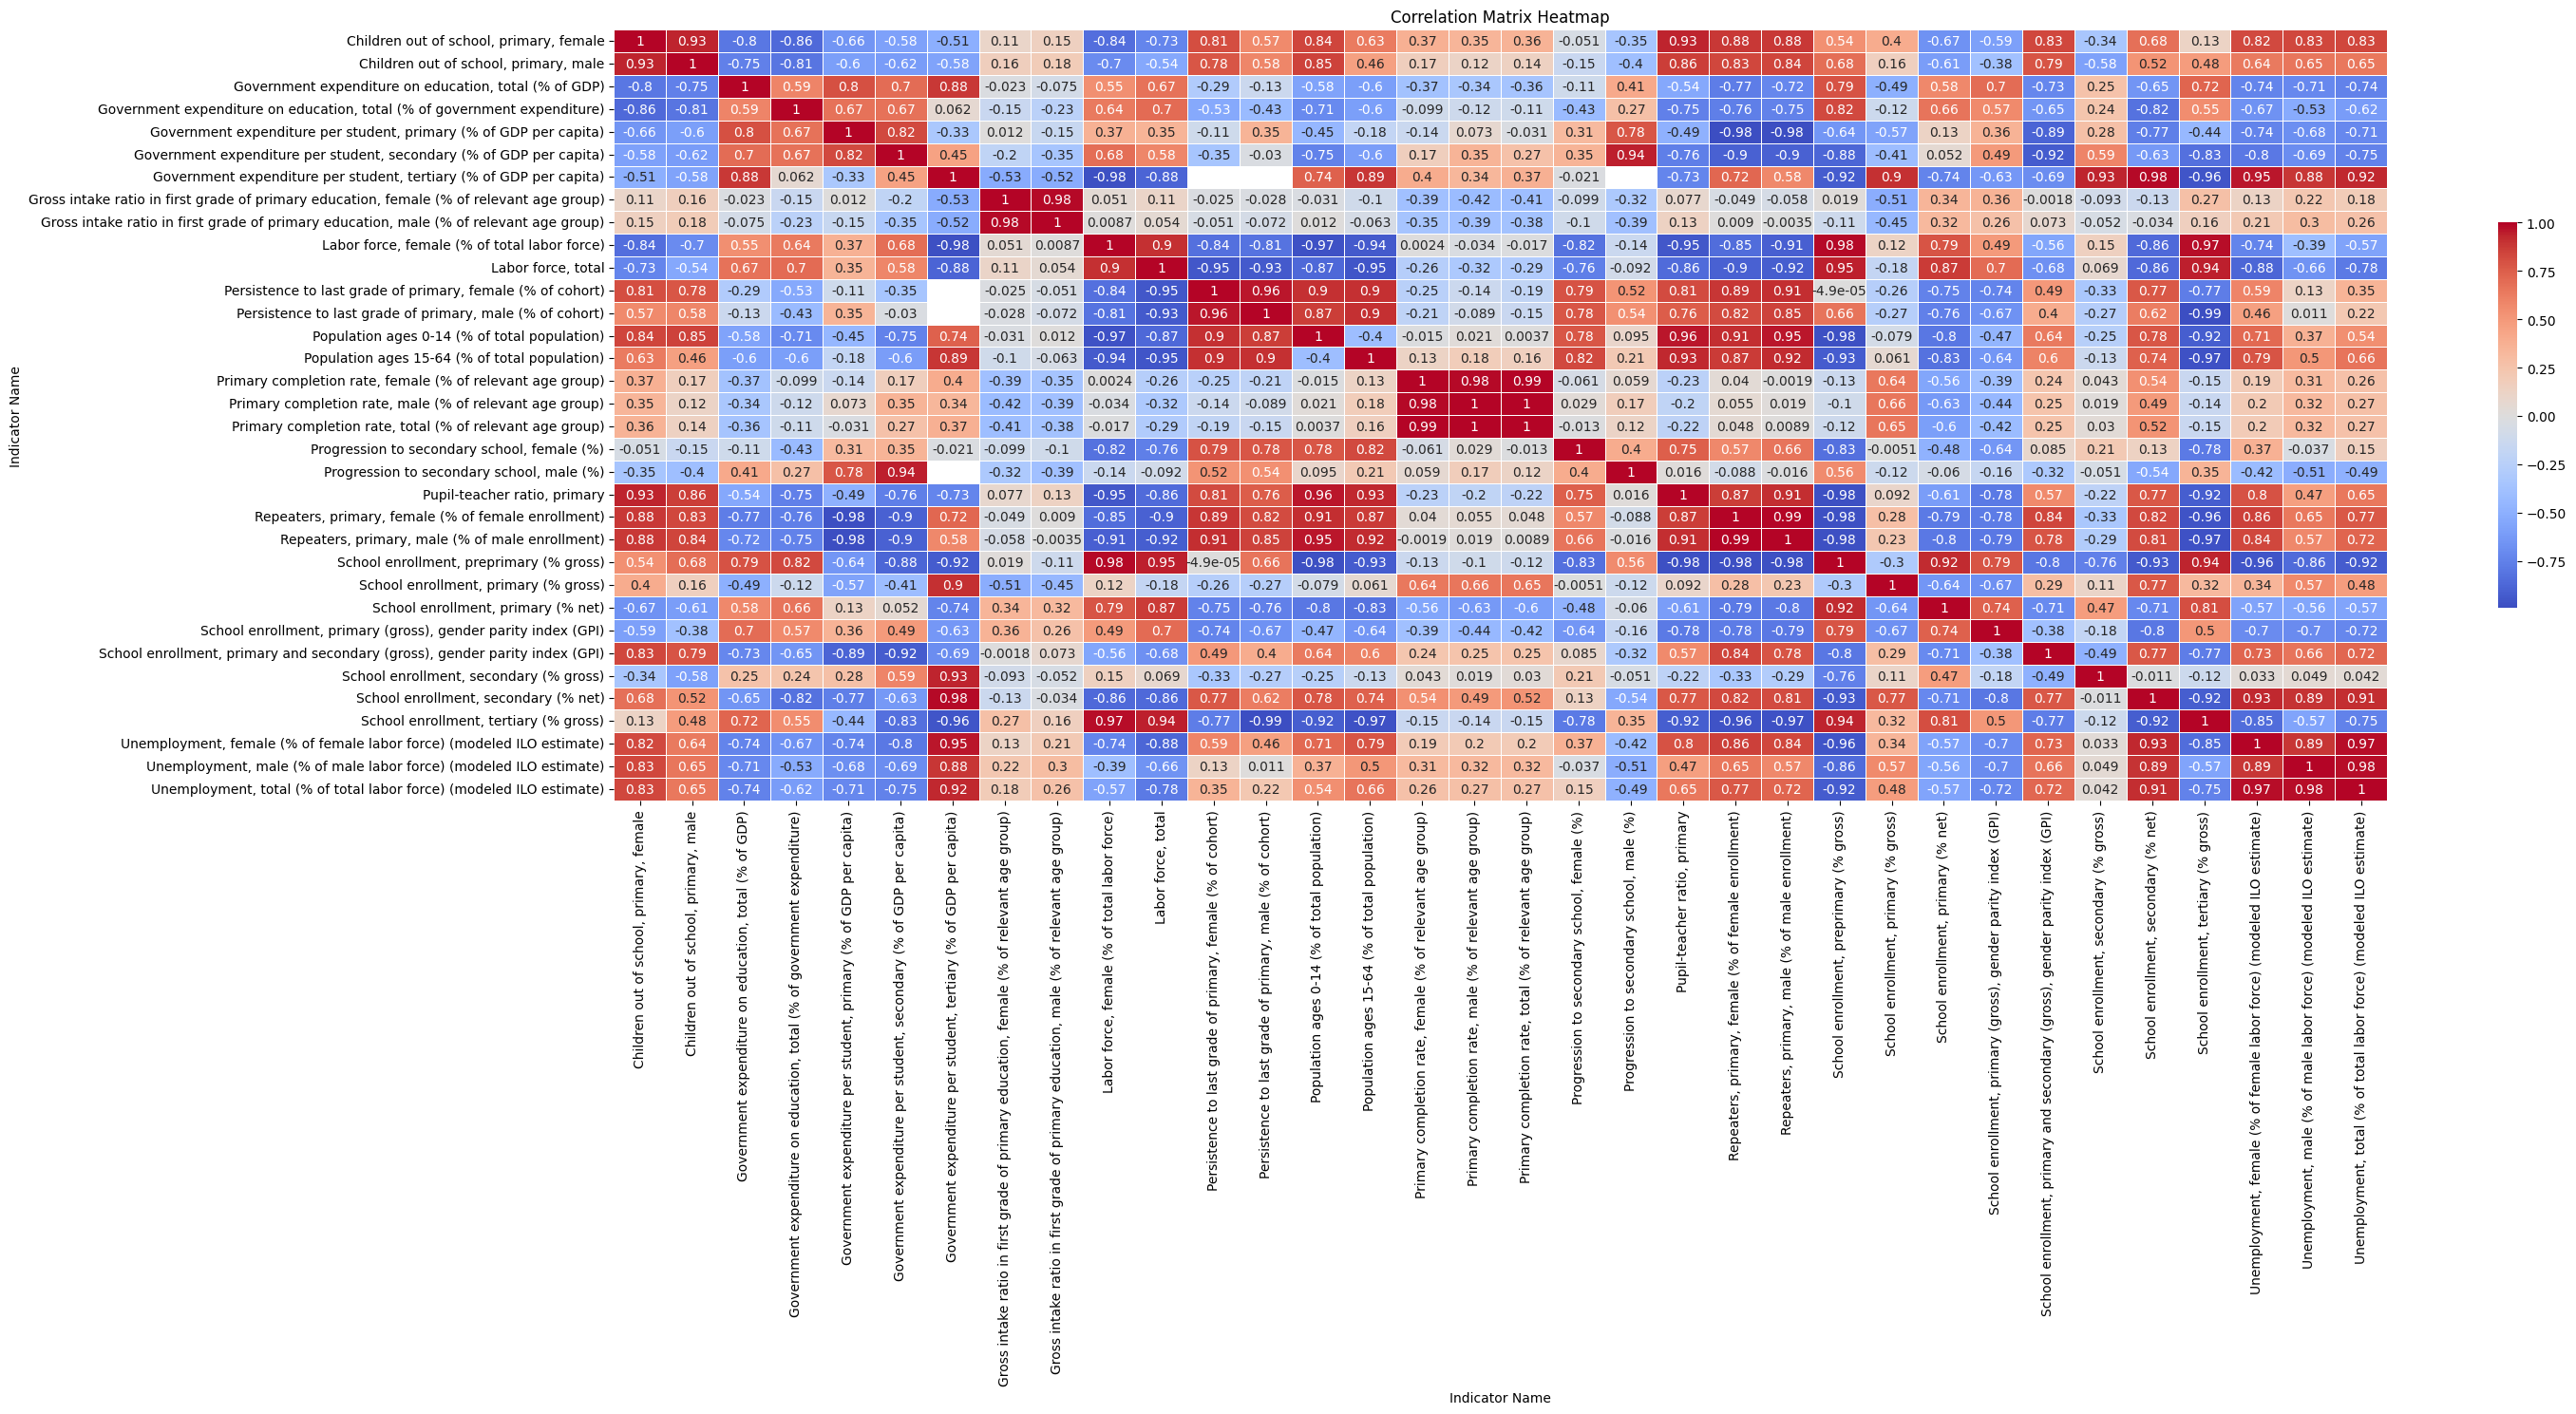

In [25]:
# Obtain the correlation matrix
correlation_matrix = df[(df['Country Code']=='DEU') & (~df['value'].isna())].pivot(index='year', columns='Indicator Name', values='value').corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            linewidths=.5, cbar_kws={"shrink": .5})
# Add title and adjust layout
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
# Show the plot
plt.show()